In [109]:
import pandas as pd
import numpy as np

## Reading Dataset

In [110]:
df = pd.read_csv('California_Houses.csv')
df.head()


,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [111]:
X = df.drop('Median_House_Value', axis=1)
y = df['Median_House_Value']

## Data Split

- Split the data into training, validation, and testing sets.
- 'X_train' and 'y_train' will be used for training your machine learning model with size 70% of the data.
- 'X_val' and 'y_val' will be used for validating and fine-tuning your model with size 15% of the data.
- 'X_test' and 'y_test' will be used for evaluating the final model's performance with size 15% of the data.


In [112]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=7)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=7)

## Feature Scaling
 
- The 'StandardScaler' performs a specific type of feature scaling called standardization or (Z-Normalization). Standardization transforms the data such that it has a mean of 0 and a standard deviation of 1. It's done by subtracting the mean and dividing by the standard deviation for each feature.

In [113]:
from sklearn.discriminant_analysis import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

## Linear Regression


In [114]:
from sklearn.linear_model import LinearRegression


linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

y_predict_linear = linear_regression.predict(X_val)


### Linear regression : (MSE & MAE)

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Linear Regression:")
mse_linear = mean_squared_error(y_val, y_predict_linear)
print(f'Mean Squared Error : {mse_linear:.3f}')

mae_linear = mean_absolute_error(y_val, y_predict_linear)
print(f"Mean Absolute Error : {mae_linear:.3f}")


Linear Regression:
Mean Squared Error : 4494277636.747
Mean Absolute Error : 48984.680


## Kfold Crossvalidation

- using kfold to get the best alpha.

In [116]:
from sklearn.model_selection import RepeatedKFold

# cross validation
cross_validation = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
alpha_values = np.arange(0.01, 1.01, 0.01)
alpha_values = np.append(alpha_values, [0.001, 0.003])
alphas = np.logspace(-4, 4, 9) 


## Ridge Regression

In [117]:
from sklearn.linear_model import RidgeCV

ridge_regression = RidgeCV(alphas = alpha_values, cv=cross_validation)
ridge_regression.fit(X_train, y_train)

y_predict_ridge = ridge_regression.predict(X_val)



In [118]:
print(ridge_regression.alpha_)

1.0


### Ridge regression : (MSE & MAE)

In [119]:
print("Ridge Regression:")
mse_ridge = mean_squared_error(y_val, y_predict_ridge)
print(f'Mean Squared Error : {mse_ridge:.3f}')

mae_ridge = mean_absolute_error(y_val, y_predict_ridge)
print(f"Mean Absolute Error : {mae_ridge:.3f}")

Ridge Regression:
Mean Squared Error : 4493471097.641
Mean Absolute Error : 48985.216


## Lasso regression

In [120]:
from sklearn.linear_model import LassoCV

lasso_regression = LassoCV(alphas=alpha_values, cv=cross_validation , max_iter=10000)
lasso_regression.fit(X_train , y_train)

y_predict_lasso = lasso_regression.predict(X_val)

In [121]:
print(lasso_regression.alpha_)

1.0


### Lasso regression : (MSE & MAE)

In [122]:
print("Lasso Regression:")
mse_lasso = mean_squared_error(y_val, y_predict_lasso)
print(f'Mean Squared Error : {mse_lasso:.3f}')

mae_lasso = mean_absolute_error(y_val, y_predict_lasso)
print(f"Mean Absolute Error : {mae_lasso:.3f}")


Lasso Regression:
Mean Squared Error : 4494089534.220
Mean Absolute Error : 48984.725


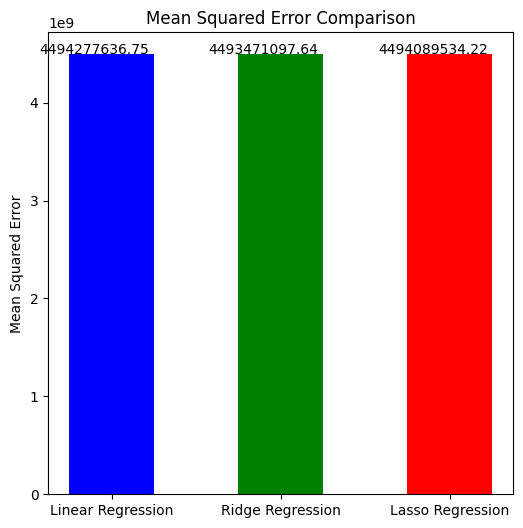

In [123]:
import matplotlib.pyplot as plt

# Define the regression methods and their respective MSE values
methods = ["Linear Regression", "Ridge Regression", "Lasso Regression"]
mse_values = [mse_linear, mse_ridge, mse_lasso]

# Create a bar chart to compare MSE values
plt.figure(figsize=(6, 6))
bars = plt.bar(methods, mse_values, color=['blue', 'green', 'red'],width = 0.5)

# Annotate the bars with their respective MSE values
for bar, mse in zip(bars, mse_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, mse + 0.001, f'{mse:.2f}', ha='center', color='black')

plt.title("Mean Squared Error Comparison")
plt.ylabel("Mean Squared Error")
plt.show()

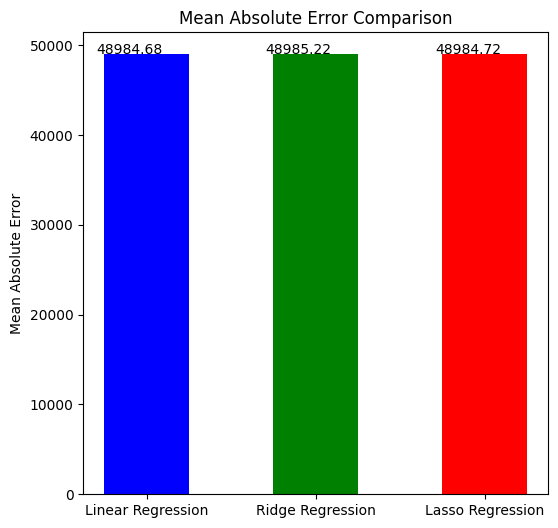

In [124]:
# Define the regression methods and their respective MAE values
methods = ["Linear Regression", "Ridge Regression", "Lasso Regression"]
mae_values = [mae_linear, mae_ridge, mae_lasso]  # Replace with your MAE values

# Create a bar chart to compare MAE values
plt.figure(figsize=(6, 6))
bars = plt.bar(methods, mae_values, color=['blue', 'green', 'red'], width =0.5)

# Annotate the bars with their respective MAE values
for bar, mae in zip(bars, mae_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, mae + 0.001, f'{mae:.2f}', ha='center', color='black')

plt.title("Mean Absolute Error Comparison")
plt.ylabel("Mean Absolute Error")
plt.show()

## Comment on the outputs

- The output is different in each model.
- The ridge and lasso has a more bias and less variance than linear regression. 

## Testing


In [125]:
y_test_linear = linear_regression.predict(X_test)
y_test_ridge = ridge_regression.predict(X_test)
y_test_lasso = lasso_regression.predict(X_test)

In [126]:
mse_linear_test = mean_squared_error(y_test, y_test_linear)
mse_ridge_test = mean_squared_error(y_test, y_test_ridge)
mse_lasso_test = mean_squared_error(y_test, y_test_lasso)

In [127]:
mae_linear_test = mean_absolute_error(y_test, y_test_linear)
mae_ridge_test = mean_absolute_error(y_test, y_test_ridge)
mae_lasso_test = mean_absolute_error(y_test, y_test_lasso)

In [128]:
print('Mean Squared Error in testing :')
print(f'Linear Regression : {mse_linear_test:.3f}')
print(f'Ridge Regression : {mse_ridge_test:.3f}')
print(f'Lasso Regression : {mse_lasso_test:.3f}')
 

Mean Squared Error in testing :
Linear Regression : 4917930970.874
Ridge Regression : 4917403467.016
Lasso Regression : 4917766703.280


In [129]:
print('Mean Absolute Error in testing :')
print(f'Linear Regression : {mae_linear_test:.3f}')
print(f'Ridge Regression : {mae_ridge_test:.3f}')
print(f'Lasso Regression : {mae_lasso_test:.3f}')

Mean Absolute Error in testing :
Linear Regression : 50822.632
Ridge Regression : 50827.220
Lasso Regression : 50823.274
